<h1><center>Exercise 7 </center></h1>
<h2><center>Image analysis using watershed</center></h2>

The purpose of this exercise is to familiarise the student with the use of advanced tools of morfological image processing in python. We will be working with the image 'cells.jpg', it's and RGB image taken with a microscope of a number of colored cells.

Our objective is to automate the process of counting the number of nuclei in the image using segmentation and mathematical morphology. This creates an alternative to the method of manual counting still in use. This process is really complicated to automate and getting the correct results since some cells can be overlapping in the image.

In [1]:
#importamos librerías necesarias
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math
from imregionalmax import imregionalmax
from imreconstruct import imreconstruct

1. Preprocesado
Realice un filtrado de la imagen aplicando un filtro alternado secuencial (ASF3) open-close
con un EE plano que corresponda a un disco. Utilice discos de tamaño creciente (radio 1,
radio 2 y radio 3). Incluya en la memoria la secuencia de instrucciones utilizada y la
secuencia de imágenes obtenida tras aplicar cada una de las etapas del ASF3. Denotaremos a
la variable que almacena la imagen resultante como ‘I_ASF3’. Comente los resultados
obtenidos.
Comandos MATLAB a utilizar: strel, imopen, imclose. 

1. Preprocessing

First read and represent 'cells.jpg' as a gray scale image.

<IPython.core.display.Javascript object>


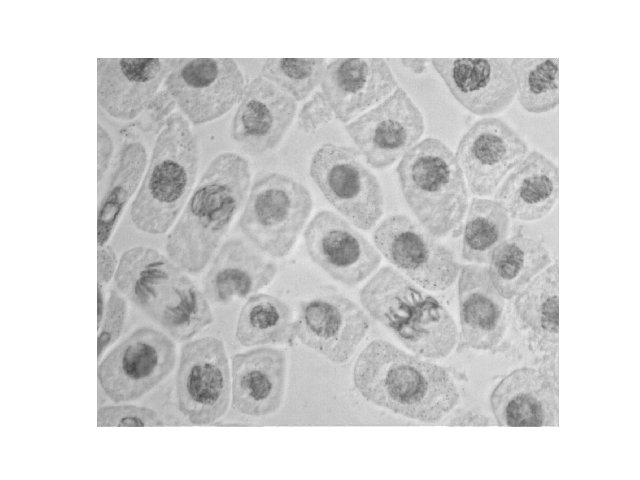

In [2]:
%matplotlib notebook
I = cv2.imread('cells.jpg', 0)
Icolor = cv2.imread('cells.jpg', 1)

plt.figure(1)
plt.imshow(I, cmap='gray')
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()


Now filter the image using an alternate sequential filter (ASF3) open-close with an circular structuring element of increasing radius (radio 1, radio 2, radio 3).

An alternate sequential filter is a filter that alternates filtering an image using the morphological opertions open and close with structuring elements of varying sizes.

Represent the result after each iteration of the filter and the final result, save this result in a variable named ASF3.

Remember the differe

<IPython.core.display.Javascript object>


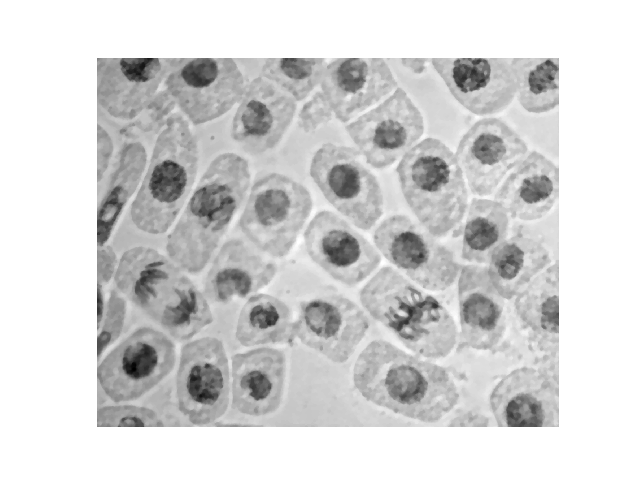

In [3]:
EE1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
EE2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
EE3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7,7))


open1 = cv2.morphologyEx(I, cv2.MORPH_OPEN, EE1)
clos1 = cv2.morphologyEx(open1, cv2.MORPH_CLOSE, EE1)
open2 = cv2.morphologyEx(clos1, cv2.MORPH_OPEN, EE2)
clos2 = cv2.morphologyEx(open2, cv2.MORPH_CLOSE, EE2)
open3 = cv2.morphologyEx(clos2, cv2.MORPH_OPEN, EE3)
I_ASF3 = cv2.morphologyEx(open3, cv2.MORPH_CLOSE, EE3)

plt.figure(2)
plt.imshow(I_ASF3, cmap='gray')
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

<IPython.core.display.Javascript object>


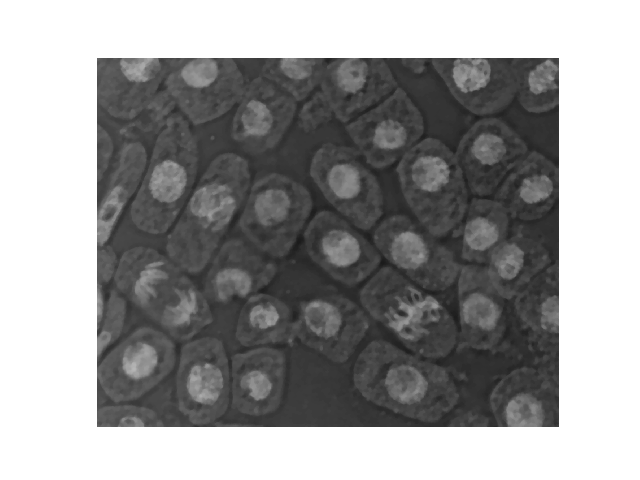

In [6]:
I_neg = 255 - I_ASF3

plt.figure('neg')
plt.imshow(I_neg, cmap='gray', vmin = 0, vmax = 255)
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

<IPython.core.display.Javascript object>


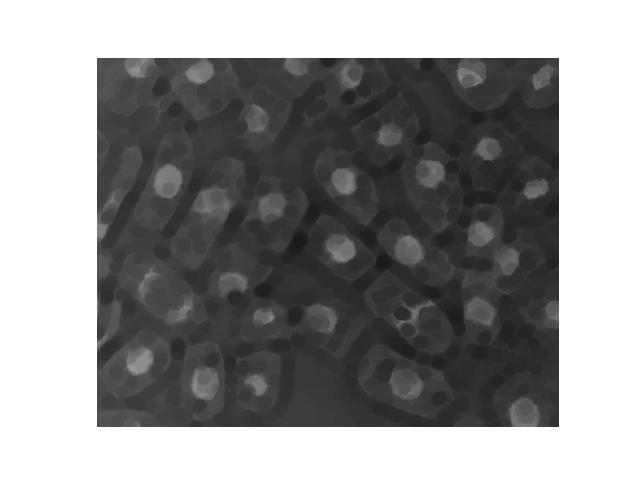

In [32]:
EEnuevo = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (25,25))

I_marker = cv2.erode(I_neg,EEnuevo,iterations = 1)
plt.figure('erosion')
plt.imshow(I_marker, cmap='gray', vmin = 0, vmax = 255)
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

In [33]:
I_rec = imreconstruct(I_marker, I_neg)

plt.figure('reconstruction')
plt.imshow(I_rec, cmap='gray', vmin = 0, vmax = 255)
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

[[87 87 87 ... 62 62 62]
 [84 84 84 ... 62 62 62]
 [84 84 83 ... 62 62 62]
 ...
 [80 80 80 ... 49 49 49]
 [80 80 80 ... 49 49 49]
 [80 80 80 ... 49 49 49]]


<IPython.core.display.Javascript object>


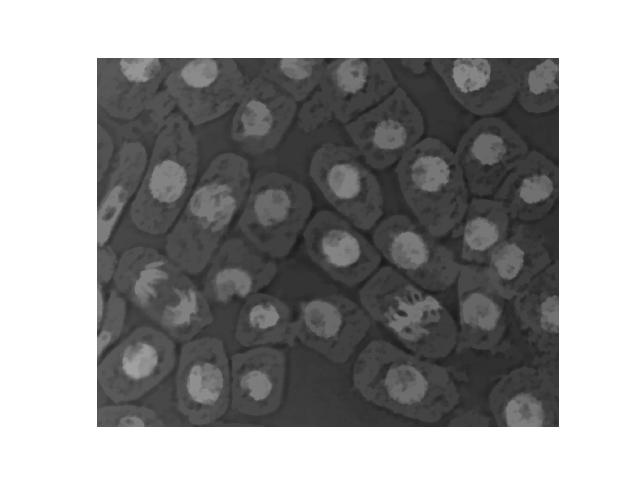

In [34]:
from skimage.morphology import reconstruction

I_rec = reconstruction(I_marker, I_neg)
plt.figure('reconstruction')
plt.imshow(I_rec, cmap='gray', vmin = 0, vmax = 255)
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

int32
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


<IPython.core.display.Javascript object>


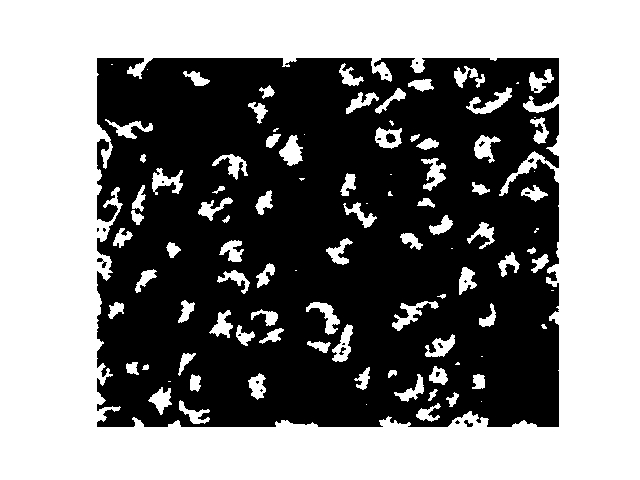

In [35]:
I_max_reg = imregionalmax(I_rec)

plt.figure('regionalmax')
plt.imshow(I_max_reg, cmap='gray', vmin = 0, vmax = 255)
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

<IPython.core.display.Javascript object>


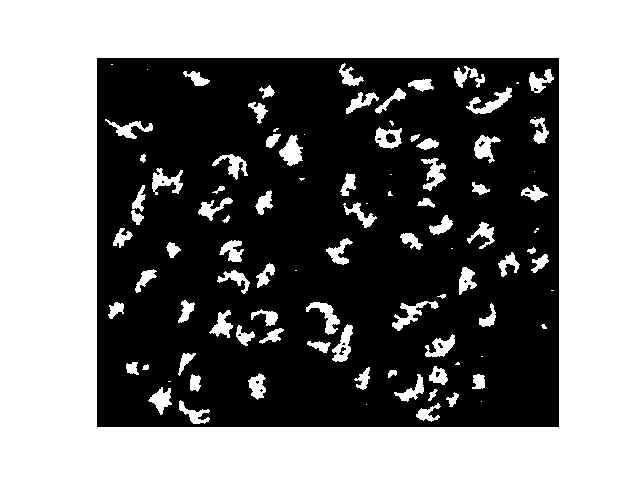

In [36]:
from clearborder import imclearborder

I_max_reg2 =  imclearborder(I_max_reg, 5)

plt.figure('I_max_reg2')
plt.imshow(I_max_reg2, cmap='gray', vmin = 0, vmax = 255)
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()
 

<IPython.core.display.Javascript object>


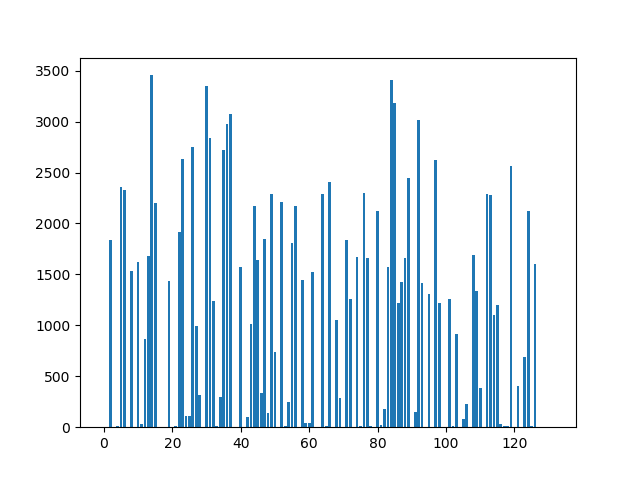

In [37]:
Nobjects, cc, stats, centroids = cv2.connectedComponentsWithStats(I_max_reg2)

V_Area = []
for i in range(0, Nobjects):
    V_Area.append(stats[i, cv2.CC_STAT_AREA])
    
No_background = V_Area[:]

No_background.pop(0)

plt.figure('No_background')
plt.bar(np.arange(len(No_background)), No_background)
#plt.xticks(np.arange(len(No_background)), rotation=90)
plt.show()

<IPython.core.display.Javascript object>


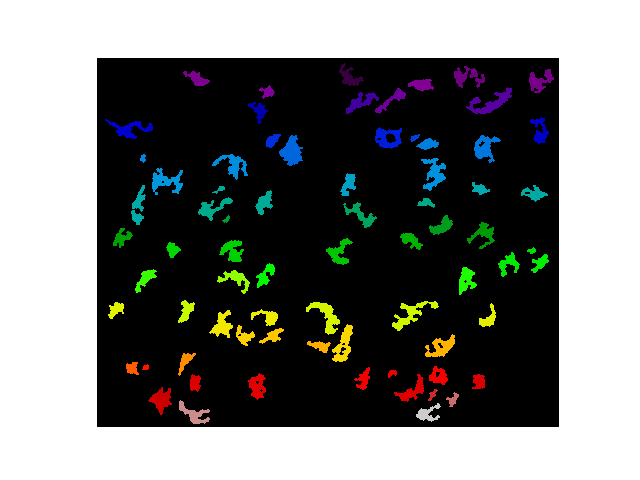

In [38]:

V_No_Interest = []
V_interest = []
for i in range(0, Nobjects):
    if V_Area[i] <= 200:
        V_No_Interest.append(i)
    else:
        V_interest.append(i)
        
for i in V_No_Interest:
    cc[cc == i] = 0

plt.figure('New Binary image')
plt.imshow(cc,cmap=plt.cm.get_cmap('nipy_spectral'))
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

<IPython.core.display.Javascript object>


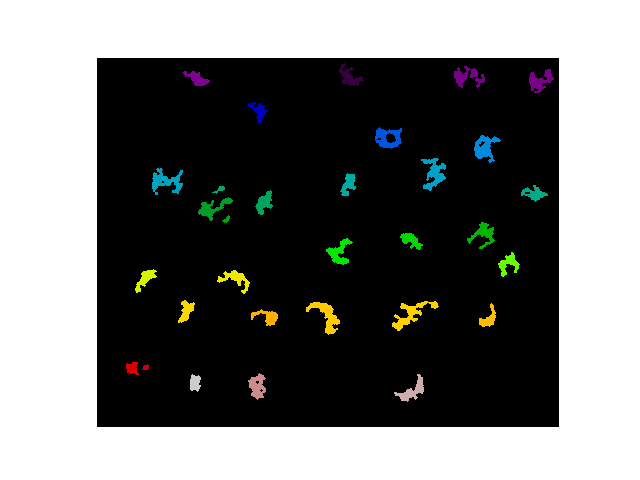

In [39]:
from skimage import data, util
from skimage.measure import label, regionprops

props = regionprops(cc, I)

for i in range(0,len(props)):
    if props[i].mean_intensity >=150:
        cc[cc==props[i].label] = 0
        
plt.figure('ultimo procesado scipy')
plt.imshow(cc,cmap=plt.cm.get_cmap('nipy_spectral'))
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()  

In [40]:
I_max_reg3 = cc.astype(np.uint8)
I_max_reg3[I_max_reg3!=0] =255

<IPython.core.display.Javascript object>


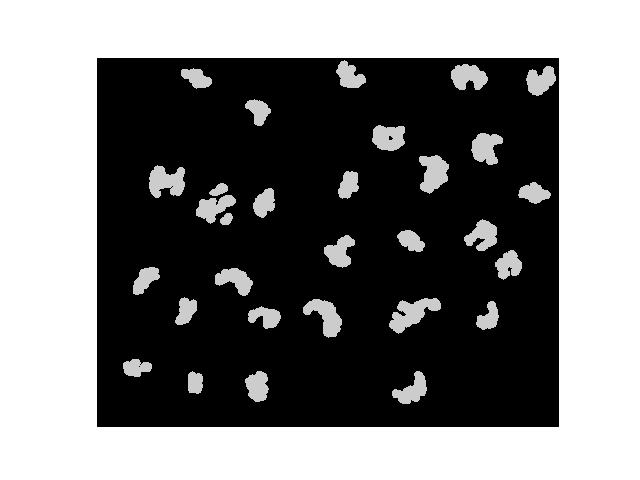

In [41]:
EE4 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15,15))

I_dilate =cv2.dilate(I_max_reg3, EE4)

plt.figure('dilate')
plt.imshow(I_dilate, cmap=plt.cm.get_cmap('nipy_spectral'))
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()


<IPython.core.display.Javascript object>


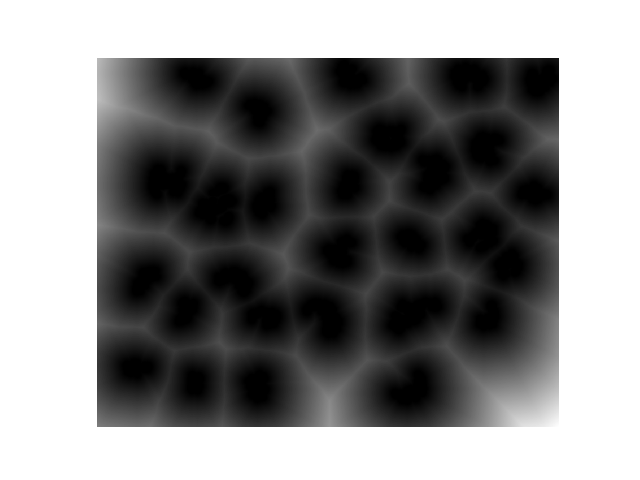

In [42]:
neg_I_dilate = 255-I_dilate
D = cv2.distanceTransform(neg_I_dilate,cv2.DIST_L2,5)

plt.figure('D')
plt.imshow(D, cmap='gray')
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()


<IPython.core.display.Javascript object>


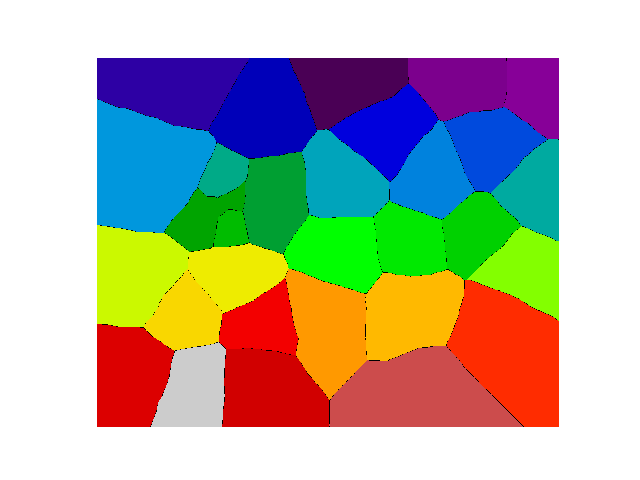

<IPython.core.display.Javascript object>


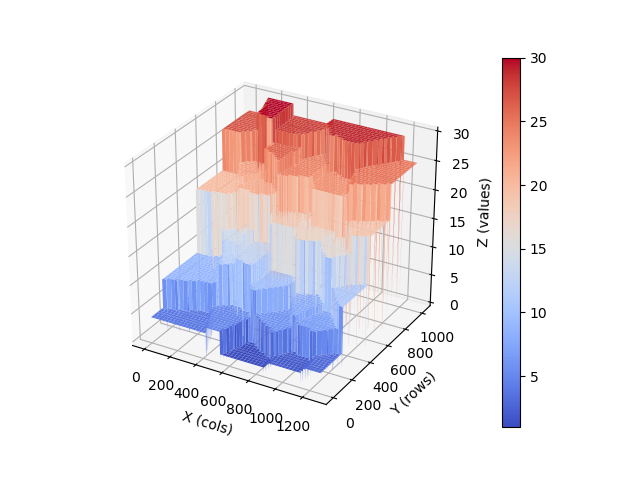

In [43]:
from skimage.morphology import watershed

DL = watershed(D,  watershed_line=True)

plt.figure('watershed 1')
plt.imshow(DL, cmap=plt.cm.get_cmap('nipy_spectral'))
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

import surface_plot as sp

(fig2, ax2, surf) = sp.surface_plot(DL, cmap=plt.cm.coolwarm)

fig2.colorbar(surf)

ax2.set_xlabel('X (cols)')
ax2.set_ylabel('Y (rows)')
ax2.set_zlabel('Z (values)')

plt.show()


<IPython.core.display.Javascript object>


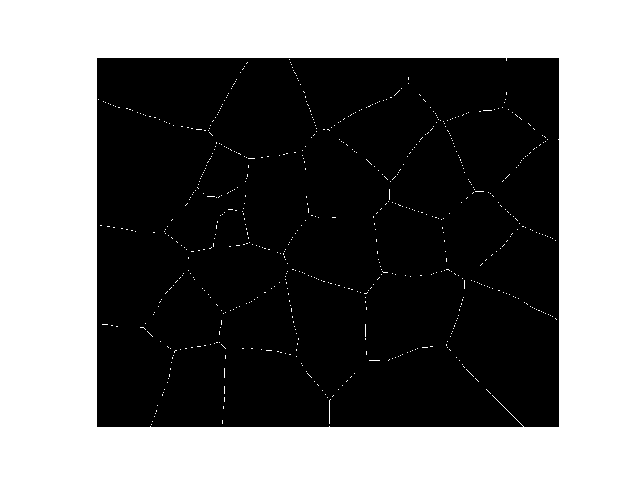

In [44]:
bgm = np.zeros(DL.shape, dtype = np.uint8)
bgm[DL == 0]= 255

plt.figure('bgm')
plt.imshow(bgm, cmap='gray', vmax = 255, vmin = 0)
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

<IPython.core.display.Javascript object>


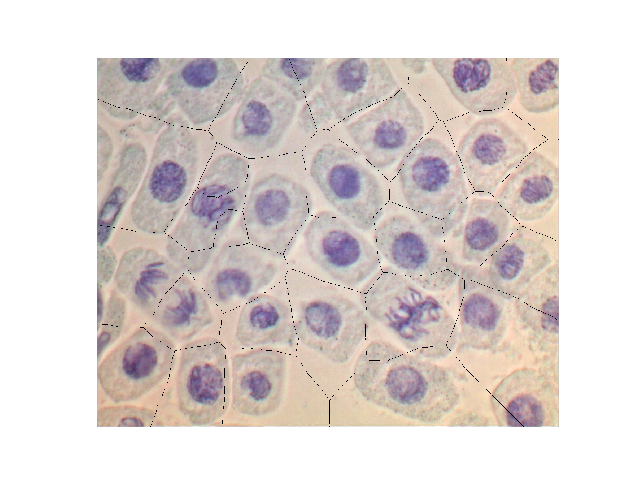

In [45]:
Inueva = cv2.imread('cells.jpg', 1)

Inueva[bgm == 255] = [0,0,0]

plt.figure('I + bgm')
plt.imshow(Inueva, cmap=plt.cm.get_cmap('nipy_spectral'))
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

bool
uint8


<IPython.core.display.Javascript object>


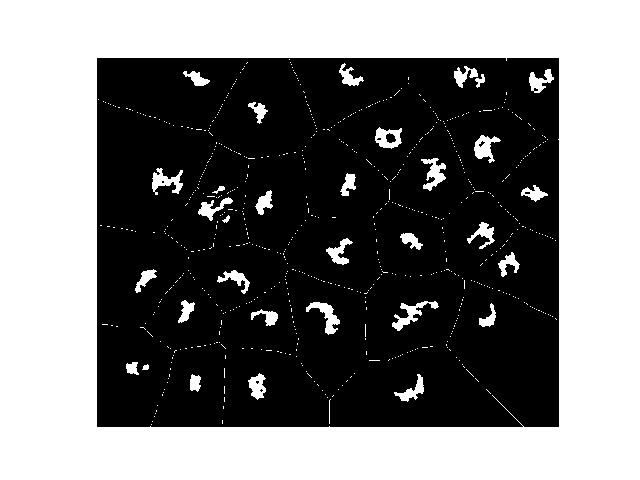

In [46]:
I_minimos = np.logical_or(I_max_reg3, bgm)
print(I_minimos.dtype)
I_minimos = np.uint8(I_minimos*255)
print(I_minimos.dtype)
plt.figure('I_minimos')
plt.imshow(I_minimos, cmap='gray', vmax = 255, vmin = 0)
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

<IPython.core.display.Javascript object>


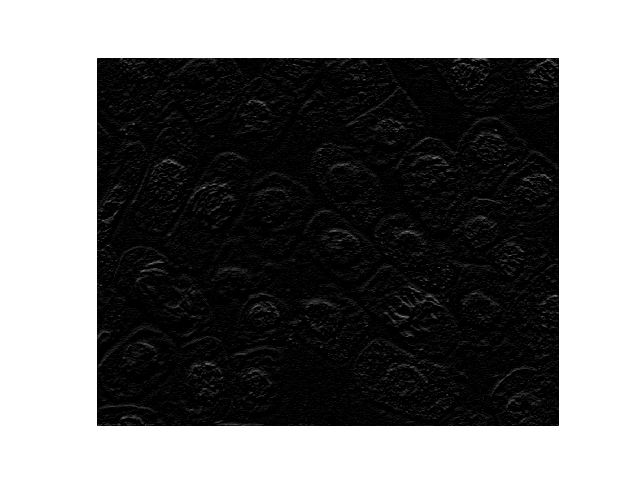

In [47]:
sobel = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
I_celulas_grad = cv2.filter2D(I, -1, sobel, borderType= cv2.BORDER_REFLECT)

plt.figure('gradiente')
plt.imshow(I_celulas_grad, cmap='gray')
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

<IPython.core.display.Javascript object>


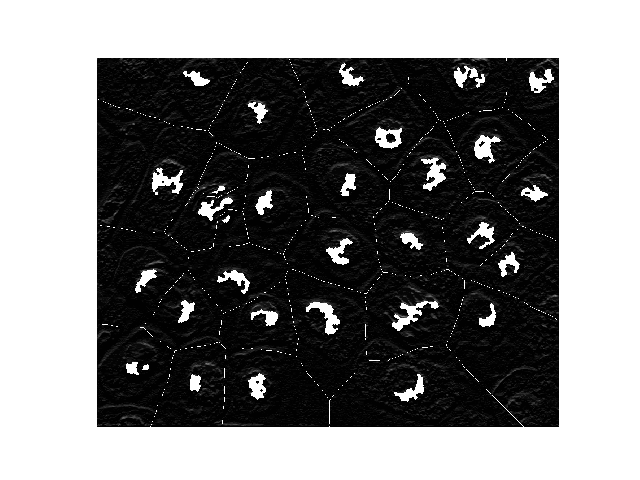

In [48]:
from imimposemin import imimposemin

I_celulas_grad_mrk=imimposemin(I_celulas_grad,I_minimos)

plt.figure('gradiente 2')
plt.imshow(I_celulas_grad_mrk, cmap='gray')
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

In [ ]:
markers2 = cv2.watershed(Icolor,markers)

plt.figure('watershed')
plt.imshow(markers2, cmap=plt.cm.get_cmap('nipy_spectral'))
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

In [ ]:
dist_transform = dist_transform.astype('int32')
print(dist_transform.dtype)
markers3 = cv2.watershed(Icolor,dist_transform)


plt.figure('sin binaria después de disttransform')
plt.imshow(markers3, cmap=plt.cm.get_cmap('nipy_spectral'))
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()